In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import json

In [2]:
rutas_archivos = [
    'Google/reviews-estados/review-California/1.json',
    'Google/reviews-estados/review-California/2.json',
    'Google/reviews-estados/review-California/3.json',
    'Google/reviews-estados/review-California/4.json',
    'Google/reviews-estados/review-California/5.json',
    'Google/reviews-estados/review-California/6.json',
    'Google/reviews-estados/review-California/7.json',
    'Google/reviews-estados/review-California/8.json',
    'Google/reviews-estados/review-California/9.json',
    'Google/reviews-estados/review-California/10.json',
    'Google/reviews-estados/review-California/11.json',
    'Google/reviews-estados/review-California/12.json',
    'Google/reviews-estados/review-California/13.json',
    'Google/reviews-estados/review-California/14.json',
    'Google/reviews-estados/review-California/15.json',
    'Google/reviews-estados/review-California/16.json',
    'Google/reviews-estados/review-California/17.json',
    'Google/reviews-estados/review-California/18.json',
]

In [3]:
todos_los_datos = []
# Iterar a través de cada archivo en la lista de rutas
for ruta_archivo in rutas_archivos:
    # Leer cada línea del archivo JSON
    with open(ruta_archivo, 'r') as f:
        for linea in f:
            # Cargar cada línea como un objeto JSON individual
            datos_json = json.loads(linea)
            # Agregar los datos al lista
            todos_los_datos.append(datos_json)


In [4]:
# Convertir a DataFrame de pandas
df_California = pd.json_normalize(todos_los_datos)

In [5]:
df_California.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,resp.time,resp.text
0,108991152262655788985,Song Ro,1609909927056,5,Love there korean rice cake.,None,NaN,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,NaN
1,111290322219796215751,Rafa Robles,1612849648663,5,Good very good,None,NaN,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,NaN
2,112640357449611959087,David Han,1583643882296,4,They make Korean traditional food very properly.,None,NaN,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,NaN
3,117440349723823658676,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,NaN,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,NaN
4,100580770836123539210,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,NaN,0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,NaN


In [6]:
df_California.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    object 
 1   name       object 
 2   time       int64  
 3   rating     int64  
 4   text       object 
 5   pics       object 
 6   resp       float64
 7   gmap_id    object 
 8   resp.time  float64
 9   resp.text  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 206.0+ MB


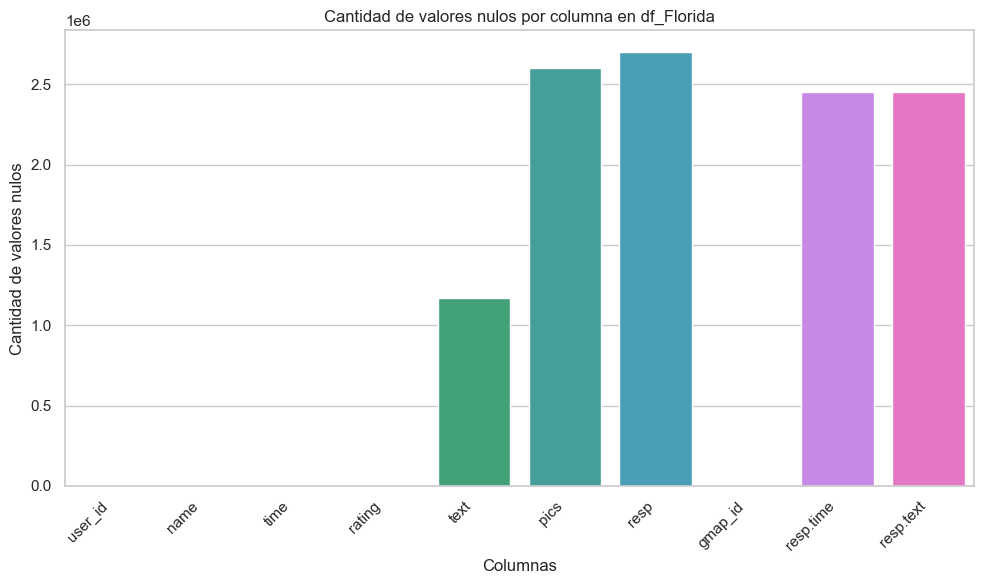

In [7]:
# Calcular el número de valores nulos en cada columna
nulos = df_California.isna().sum()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=nulos.index, y=nulos.values, palette='husl')
plt.title('Cantidad de valores nulos por columna en df_Florida')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observan gran cantidad de nulos en las columnas de respuestas y fotos, a continuacion la misma informacion pero en porcentage del total


In [8]:
# Calcular el número total de filas en el DataFrame
total_filas = len(df_California)
# Calcular el número de valores nulos en cada columna
nulos = df_California.isna().sum()
# Calcular los porcentajes de valores nulos en cada columna
porcentaje_nulos = (nulos / total_filas) * 100

In [9]:
porcentaje_nulos

user_id        0.000000
name           0.000000
time           0.000000
rating         0.000000
text          43.369037
pics          96.322593
resp         100.000000
gmap_id        0.000000
resp.time     90.919667
resp.text     90.919667
dtype: float64

La columna de resp, todos nulos, y pics se eliminaran debido a la poca informacion aportada. La coluna resp.time y resp.text se evaluara mas adelante debido a que puede tener influencia la tasa de respuesta de un local en el rating, ya que pueden mostrar interes en mejorar el servicio y aclarar dudas en sus potenciales clientes


Se eliminan las columnas innecesarias

In [11]:
# Eliminar las columnas 'time', 'resp' y 'pics'
df_California = df_California.drop(['resp', 'pics'], axis=1)

In [12]:
cantidad_filas_repetidas = df_California.duplicated().sum()
print("Cantidad de filas repetidas:", cantidad_filas_repetidas)

Cantidad de filas repetidas: 75243


Se convierte la columna time en una fecha legible para poder analizar la evolucion de las variables a travez del tiempo

In [13]:
# Convertir la columna 'time' a formato de fecha y hora
df_California['time'] = pd.to_datetime(df_California['time'], unit='ms')

# Crear una nueva columna con la fecha formateada como 'dd/mm/yyyy'
df_California['fecha'] = df_California['time'].dt.strftime('%d/%m/%Y')

In [14]:
df_California = df_California.drop(['time'], axis=1)

Se procede a evaluar los ratings

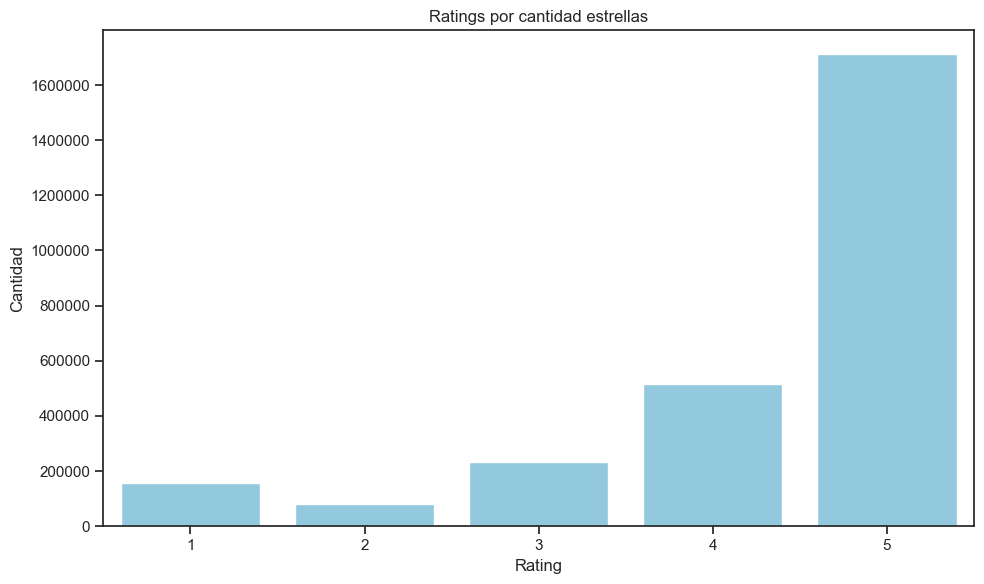

In [15]:
# Configurar el estilo de Seaborn
sns.set(style="ticks")
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_California, x='rating', color='skyblue')
plt.title('Ratings por cantidad estrellas')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

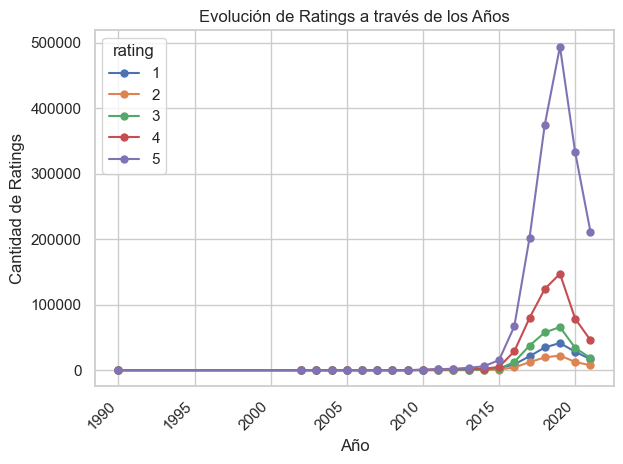

In [16]:
# Extraer el año de la columna 'fecha'
df_California['year'] = pd.to_datetime(df_California['fecha'], format='%d/%m/%Y').dt.year
# Agrupar por año y rating, y contar cuántas veces ocurre cada rating en cada año
rating_counts_by_year = df_California.groupby(['year', 'rating']).size().unstack(fill_value=0)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
rating_counts_by_year.plot(kind='line', marker='o', markersize=5)
plt.title('Evolución de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observa una cola hacia la derecha en la cantidad de reseñas por lo que veremos la cantidad de reseñas por año mas adelante

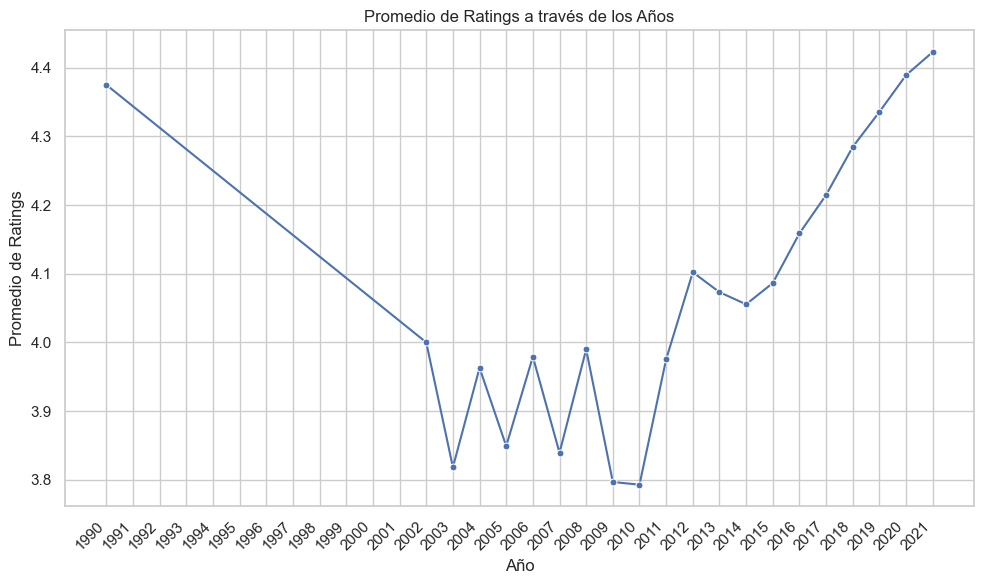

In [17]:
# Extraer el año de la columna 'fecha'
df_California['year'] = pd.to_datetime(df_California['fecha'], format='%d/%m/%Y').dt.year

# Calcular el promedio de todos los ratings para cada año
average_rating_by_year = df_California.groupby('year')['rating'].mean()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year, marker='o', markersize=5)
plt.title('Promedio de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Ratings')
plt.xticks(range(int(min(average_rating_by_year.index)), int(max(average_rating_by_year.index))+1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mas adelante evaluaremos la cantidad de datos, pero en este grafico se ven posibles outliers en los primeros años, sobre todo ese dato de 1990. Con el logico aumetno de las reseñas a lo largo de los años, vemos una estabilizacion a partir del 2012 con una tendencia creciente en la satisfaccion del cliente

Procedemos a ver la cantidad de reseñas por año

In [18]:
# Extraer el año de la columna 'fecha'
df_California['year'] = pd.to_datetime(df_California['fecha'], format='%d/%m/%Y').dt.year
# Contar el número de reseñas por año
reviews_per_year = df_California.groupby('year').size()
# Mostrar el resultado
print(reviews_per_year)

year
1990         8
2002         5
2003        11
2004        27
2005        53
2006        48
2007        56
2008        99
2009       182
2010      2143
2011      3778
2012      4443
2013      7505
2014     10603
2015     26800
2016    121301
2017    352864
2018    610549
2019    771747
2020    486540
2021    301238
dtype: int64


Hay un constane crecimiento en la cantidad de reseñas hasta el año 2020, en el cual decrece. Esto se puede deber a la pandemia global de ese año